<a href="https://colab.research.google.com/github/mzk8888/HTML-select/blob/main/Quantum_Machine_Learning_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane

In [ ]:
import tqdm #ローディング時間を可視化する

In [ ]:
TRAIN_START ='2016-01-01' #訓練データ
TRAIN_END = '2016-12-31'

In [ ]:
PRED_START ='2017-01-01' #予測データ
PRED_END = '2018-03-01'

In [ ]:
from pandas_datareader import data as pdr #金融データ
import yfinance as yf #アメリカのヤフーファイナンス
yf.pdr_override() #ヤフーファイナンスを上書き

In [ ]:
df1 = pdr.get_data_yahoo("IBM", start=TRAIN_START, end=TRAIN_END) #IBMを株価データを読み込む

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df1 #読み込むデータを可視化

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,129.636703,129.990433,128.336517,129.971313,89.534294,5469952
2016-01-05,130.745697,130.869980,128.919693,129.875717,89.468452,4105341
2016-01-06,128.470367,129.617584,127.743790,129.225616,89.020607,4509201
2016-01-07,127.820267,129.082214,126.606117,127.017204,87.499275,7348987
2016-01-08,127.323135,127.934990,125.544930,125.841301,86.689217,4981784
...,...,...,...,...,...,...
2016-12-23,159.655838,160.124283,159.130020,159.378586,113.976036,1779455
2016-12-27,159.636703,160.592728,159.512421,159.789673,114.269981,1461785
2016-12-28,159.933075,160.363297,158.699814,158.881454,113.620491,1838345


In [ ]:
df2 = pdr.get_data_yahoo("GOOG", start=TRAIN_START, end=TRAIN_END) #Google金融データ読み込む

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,37.150002,37.202999,36.562901,37.091999,37.091999,65456000
2016-01-05,37.322498,37.599998,36.931999,37.129002,37.129002,39014000
2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000
2016-01-07,36.515499,36.924999,35.952999,36.319500,36.319500,59274000
2016-01-08,36.572498,36.661499,35.650002,35.723499,35.723499,49018000
...,...,...,...,...,...,...
2016-12-23,39.544998,39.637001,39.363998,39.495499,39.495499,12468000
2016-12-27,39.534000,39.893002,39.382851,39.577499,39.577499,15782000
2016-12-28,39.685001,39.711498,39.160000,39.252499,39.252499,23076000


In [ ]:
df_ref1 = pdr.get_data_yahoo("IBM", start=PRED_START, end=PRED_END)
df_ref2 = pdr.get_data_yahoo("GOOG", start=PRED_START, end=PRED_END) #GOOG　ヤフーファイナンスの省略文字

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
cdata1 = []
cdata2 = [] #空リスト
cdata_ref1 = []
cdata_ref2 = [] #予言用リスト

In [ ]:
for i in df1['Close']: #def1の終値を出力　i終値
    cdata1.append(i) #Cdata1に入れていく

In [ ]:
for i in df2['Close']: #Googleの格納されたデータが出力
    cdata2.append(i)

In [ ]:
for i in df_ref1['Close']:
    cdata_ref1.append(i)
for i in df_ref2['Close']:
    cdata_ref2.append(i)

In [ ]:
data1 = [] #IBM格納
data2 = [] #GOOG格納
for i in range(len(cdata1)): #学習用格納データ range Σの上下
    data1.append(cdata1[i]) #データ格納
    data2.append(cdata2[i])

for i in range(30): #30区画のみを予測する　範囲指定
    data1.append(cdata_ref1[i])
    data2.append(cdata_ref2[i])


In [ ]:
from pennylane import numpy as np #pennylaneのnumpyを使用
diff_log1 = np.log(data1) #対数を取る
diff_log2 = np.log(data2)

In [ ]:
diff_series1 = np.diff(diff_log1) #変動　確率過程を学習する　隣同士の引算
diff_series2 = np.diff(diff_log2)

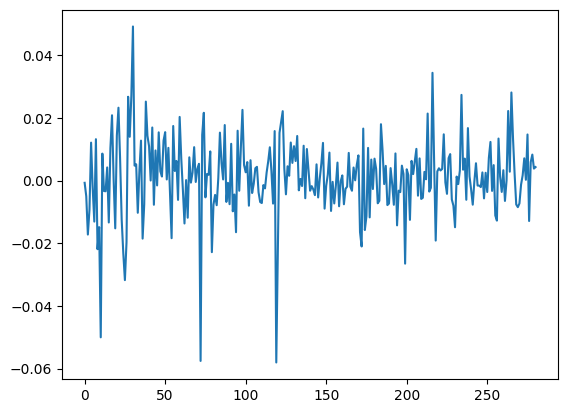

In [ ]:
import matplotlib.pyplot as plt #0から上下の変動
plt.plot(diff_series1)

In [ ]:
par = 2 #分解能
def make_range(y, par=par): #make_range関数
    max_y = max(y) #最大値のy
    min_y = min(y) #最小値のy
    range_list = np.percentile(y, q = [50]) #確率の区切り　50％

    temp_list = np.concatenate([[min_y],range_list]) #2つの文字の羅列をまとめる
    temp_list = np.concatenate([temp_list,[max_y]]) #最大値の仕切り板

    ave_list = [] #平均値を調べる
    for k in range(len(temp_list)-1):
      ave_list.append((temp_list[k]+temp_list[k+1])/2) #append追加

    return range_list,ave_list

In [ ]:
range_list1,ave_list1 = make_range(diff_series1[-30:]) #最後から30個省いたデータを出力
range_list2,ave_list2 = make_range(diff_series2[-30:])

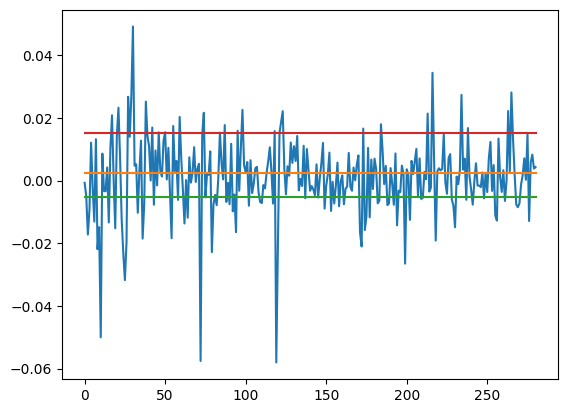

In [ ]:
import matplotlib.pyplot as plt
plt.plot(diff_series1)
plt.plot(range(len(diff_series1)),range_list1[0]*np.ones(len(diff_series1))) #全体の平均値
plt.plot(range(len(diff_series1)),ave_list1[0]*np.ones(len(diff_series1))) #平均値の上0
plt.plot(range(len(diff_series1)),ave_list1[1]*np.ones(len(diff_series1))) #平均値の下1
plt.show()

In [ ]:
def make_discrete(y,range_list,par=par): #教師データ作成　量子回路
  dis_time =  [] #時変動データ
  for v in y: #yをvとして導入
    for k in range(par):
      if k == 0:
        if v < range_list[k]:
          dis_time.append(k)
      elif k == par - 1:
        if range_list[-1] <= v:
          dis_time.append(k)
      else:
        if range_list[k-1] <= v < range_list[k]:
          dis_time.append(k)

  return dis_time

In [ ]:
dis_time1 = make_discrete(diff_series1,range_list1)
dis_time2 = make_discrete(diff_series2,range_list2)

In [ ]:
mat1 = np.zeros([par,par]) #行列

In [ ]:
for time in range(len(dis_time1)-30):#端は省く
  t1 = dis_time1[time] #今の時刻を調べる
  t2 = dis_time1[time+1] #次の時刻を調べる
  mat1[t1][t2] +=1 #行列のt1とt2を調べる

In [ ]:
z_list1 = []
for p in range(par):
  z_list1.append([sum(mat1[p,:])])

In [ ]:
mat1 = mat1/np.array(z_list1)

In [ ]:
def make_mat(dis_time,par=par):
  mat = np.zeros([par,par])
  for time in range(len(dis_time)-30):#端は省く
    t1 = dis_time[time]
    t2 = dis_time[time+1]
    mat[t1][t2] +=1

  z_list = []
  for p in range(par):
    z_list.append([sum(mat[p,:])])

  mat = mat/np.array(z_list)

  return mat

In [ ]:
mat1 = make_mat(dis_time1) #GoogleとIBMの繊維行列,乱数値
mat2 = make_mat(dis_time2)

In [ ]:
def make_mat_k(mat,k): #行列の累乗
  mat = np.matrix(mat)
  return mat**(k+1)

In [ ]:
import pennylane as qml #量子回路
from pennylane.templates import StronglyEntanglingLayers

qubits_data = int(np.log2(par))*2
qubits_data_ancilla = qubits_data
n_qubits  = qubits_data + qubits_data_ancilla

dev = qml.device('default.qubit', wires = n_qubits)
@qml.qnode(dev, interface="autograd") #autograd 自動的に微分する
def circuit(weights, gamma, state1, state2, t, qubits_data, qubits_data_ancilla): #パラメータ
  n_qubits  = qubits_data + qubits_data_ancilla
  qubits_data1 =int(qubits_data/2) #相関関係のエンタングルメント
  qubits_data2 =int(qubits_data/2)

  bin_str = '0'+str(int(np.log2(par)))+'b'#2進数表示

  for i in range(qubits_data1): #IBM
    qml.PauliX(i)**int(format(state1, bin_str)[i]) #paulix 01を反転させる、state1は2進数

  for j in range(qubits_data2): #GOOG
    qml.PauliX(j+qubits_data1)**int(format(state2, bin_str)[j]) #データのエンタングルメント

  qml.StronglyEntanglingLayers(weights, wires=range(n_qubits)) #エンタングルメントデータ

  for i in range(n_qubits):
    qml.RZ(t*gamma[i], wires= i)

  qml.adjoint(StronglyEntanglingLayers)(weights, wires=range(n_qubits)) #逆にエンタングルメント

  return [qml.probs(wires=[i for i in range(qubits_data1)]), qml.probs(wires=[i+qubits_data1 for i in range(qubits_data2)])] #内包表記

Qnode = qml.QNode(circuit,dev)

In [ ]:
def cost(weights_ansatz, gamma, qubits_data, qubits_data_ancilla, mat1, mat2, Tmat = 30, ep = 10e-5): #コスト関数
  c = 0
  for t in range(Tmat):
    for s1 in range(par):
      for s2 in range(par):
        [output1,output2] = Qnode(weights_ansatz, gamma, s1, s2,  t, qubits_data, qubits_data_ancilla)
        mat_k1 = np.array(make_mat_k(mat1, t)) #確率行列
        mat_k2 = np.array(make_mat_k(mat2, t))

        for i in range(len(output1)):
          c += output1[i]*np.log(output1[i]/(mat_k1[i][s1]+ep)) #KL情報量
        for i in range(len(output2)):
          c += output2[i]*np.log(output2[i]/(mat_k2[i][s1]+ep))

  return c

In [ ]:
max_steps = 20 #学習のステップ数
opt = qml.AdamOptimizer(0.1) #機械学習の最適化

In [ ]:
shape = qml.StronglyEntanglingLayers.shape(n_layers = 1, n_wires=n_qubits)
weights_ansatz = 2 * np.pi *   np.random.random(size=shape)
gamma = 2 * np.pi * np.random.random(n_qubits)

In [ ]:
gamma.requires_grad

True

In [ ]:
cost_series = [] #ニューラルネットワーク

In [ ]:
for step in tqdm.tqdm(range(max_steps)):
  cost_temp = cost(weights_ansatz, gamma, qubits_data, qubits_data_ancilla, mat1,  mat2) #コスト関数
  cost_series.append(cost_temp)
  weights_ansatz, gamma, _, _, _, _ = opt.step(cost,weights_ansatz, gamma, qubits_data, qubits_data_ancilla, mat1, mat2)
  print(weights_ansatz)

  5%|▌         | 1/20 [00:11<03:42, 11.69s/it]

[[[3.62237544 2.1151706  4.41373174]
  [2.86049581 1.97821718 4.25981291]
  [1.97697224 1.37704158 4.6911751 ]
  [5.38091355 5.16473687 1.97444431]]]


 10%|█         | 2/20 [00:25<03:58, 13.22s/it]

[[[3.62237545 2.06053904 4.41373173]
  [2.8604958  2.00881395 4.25981291]
  [1.97697224 1.46595631 4.69117511]
  [5.38091355 5.06737812 1.97444432]]]


 15%|█▌        | 3/20 [00:35<03:16, 11.57s/it]

[[[3.62237546 1.99034172 4.41373173]
  [2.8604958  1.994872   4.25981291]
  [1.97697224 1.55612764 4.69117511]
  [5.38091355 4.97456296 1.97444432]]]


 20%|██        | 4/20 [00:45<02:52, 10.76s/it]

[[[3.62237547 1.91746785 4.41373172]
  [2.8604958  1.95482362 4.25981291]
  [1.97697224 1.63011548 4.69117511]
  [5.38091354 4.88651698 1.97444431]]]


 25%|██▌       | 5/20 [00:54<02:33, 10.25s/it]

[[[3.62237547 1.8497316  4.4137317 ]
  [2.86049581 1.90332168 4.25981289]
  [1.97697223 1.67480288 4.6911751 ]
  [5.38091353 4.80120063 1.9744443 ]]]


 30%|███       | 6/20 [01:04<02:21, 10.10s/it]

[[[3.62237548 1.79398351 4.41373169]
  [2.86049581 1.84887776 4.25981289]
  [1.97697222 1.67715454 4.6911751 ]
  [5.38091352 4.73041395 1.9744443 ]]]


 35%|███▌      | 7/20 [01:13<02:09,  9.98s/it]

[[[3.62237549 1.75611454 4.41373168]
  [2.86049582 1.80715199 4.25981288]
  [1.97697222 1.65256623 4.69117509]
  [5.38091352 4.67340873 1.9744443 ]]]


 40%|████      | 8/20 [01:23<01:58,  9.88s/it]

[[[3.62237549 1.72845878 4.41373167]
  [2.86049583 1.7753924  4.25981287]
  [1.97697222 1.61906243 4.69117508]
  [5.38091351 4.62732538 1.9744443 ]]]


 45%|████▌     | 9/20 [01:33<01:48,  9.84s/it]

[[[3.62237549 1.71052699 4.41373166]
  [2.86049583 1.75196024 4.25981286]
  [1.97697222 1.58764186 4.69117507]
  [5.3809135  4.59684159 1.9744443 ]]]


 50%|█████     | 10/20 [01:42<01:37,  9.74s/it]

[[[3.6223755  1.69979242 4.41373166]
  [2.86049583 1.73635557 4.25981286]
  [1.97697222 1.55056593 4.69117506]
  [5.3809135  4.58208056 1.9744443 ]]]


 55%|█████▌    | 11/20 [01:52<01:28,  9.79s/it]

[[[3.6223755  1.69458134 4.41373164]
  [2.86049582 1.72869589 4.25981286]
  [1.97697222 1.51400985 4.69117506]
  [5.3809135  4.57870275 1.9744443 ]]]


 60%|██████    | 12/20 [02:02<01:18,  9.87s/it]

[[[3.62237551 1.69257999 4.41373164]
  [2.86049582 1.72563118 4.25981286]
  [1.97697223 1.4752728  4.69117505]
  [5.3809135  4.58394225 1.97444431]]]


 65%|██████▌   | 13/20 [02:19<01:23, 11.91s/it]

[[[3.62237551 1.69439943 4.41373164]
  [2.86049581 1.72912809 4.25981286]
  [1.97697224 1.43652061 4.69117505]
  [5.3809135  4.59315625 1.9744443 ]]]


 70%|███████   | 14/20 [02:29<01:08, 11.34s/it]

[[[3.6223755  1.70021712 4.41373165]
  [2.86049581 1.73690037 4.25981287]
  [1.97697224 1.41575024 4.69117505]
  [5.3809135  4.60417274 1.9744443 ]]]


 75%|███████▌  | 15/20 [02:39<00:53, 10.79s/it]

[[[3.62237549 1.70972537 4.41373165]
  [2.8604958  1.74756904 4.25981287]
  [1.97697225 1.40430808 4.69117504]
  [5.3809135  4.62070582 1.97444429]]]


 80%|████████  | 16/20 [02:49<00:42, 10.62s/it]

[[[3.62237549 1.72345697 4.41373166]
  [2.86049581 1.76073174 4.25981286]
  [1.97697225 1.39757691 4.69117503]
  [5.38091349 4.6474704  1.97444429]]]


 85%|████████▌ | 17/20 [02:58<00:30, 10.17s/it]

[[[3.62237549 1.74118621 4.41373166]
  [2.86049581 1.77568828 4.25981286]
  [1.97697225 1.398386   4.69117503]
  [5.38091349 4.68082772 1.97444428]]]


 90%|█████████ | 18/20 [03:08<00:20, 10.07s/it]

[[[3.62237549 1.76154188 4.41373168]
  [2.86049581 1.79127829 4.25981285]
  [1.97697225 1.40738112 4.69117502]
  [5.38091348 4.71267985 1.97444428]]]


 95%|█████████▌| 19/20 [03:19<00:10, 10.29s/it]

[[[3.62237549 1.78428926 4.41373169]
  [2.86049581 1.8076915  4.25981285]
  [1.97697225 1.42829634 4.69117501]
  [5.38091347 4.73708864 1.97444427]]]


100%|██████████| 20/20 [03:29<00:00, 10.47s/it]

[[[3.62237549 1.80869301 4.41373171]
  [2.86049579 1.82504658 4.25981284]
  [1.97697226 1.45499236 4.691175  ]
  [5.38091346 4.75312776 1.97444426]]]


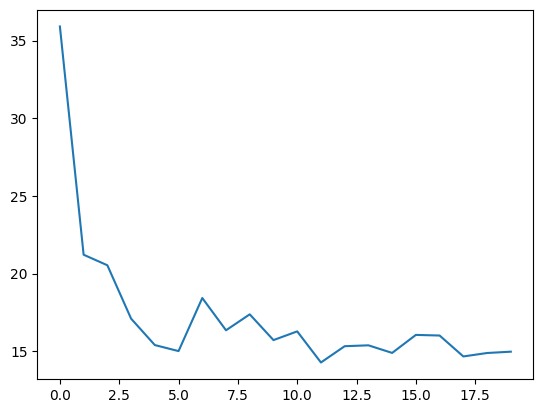

In [ ]:
plt.plot(cost_series) #コスト関数の推移

In [ ]:
Tpred = 10
Nsample = 100
state_sample1 = []
state_sample2 = []

for sample in range(Nsample):
  state1 = dis_time1[-30]
  state2 = dis_time2[-30]
  state_series1 = []
  state_series2 = []
  for t in range(Tpred):
    prob1,prob2 = Qnode(weights_ansatz, gamma, state1, state2, t, qubits_data, qubits_data_ancilla)
    state1 = np.random.choice(par, p=prob1)
    state2 = np.random.choice(par, p=prob2)
    state_series1.append(state1)
    state_series2.append(state2)
  state_sample1.append(state_series1)
  state_sample2.append(state_series2)

In [ ]:
range_list1

In [ ]:
pred_sample1 = []
for state_series1 in state_sample1:
  pred_series1 = []
  for itemp in state_series1:
    pred_series1.append(ave_list1[itemp])
  pred_sample1.append(pred_series1)

pred_sample2 = []
for state_series2 in state_sample2:
  pred_series2 = []
  for itemp in state_series2:
    pred_series2.append(ave_list2[itemp])
  pred_sample2.append(pred_series2)

In [ ]:
ave1 = np.zeros(len(pred_series1))
for pred_series1 in pred_sample1:
  ave1 += np.array(pred_series1)
ave1 = ave1/len(pred_sample1)

ave2 = np.zeros(len(pred_series2))
for pred_series2 in pred_sample2:
  ave2 += np.array(pred_series2)
ave2 = ave2/len(pred_sample2)

In [ ]:
pred_series1

[tensor(0.01525921, requires_grad=True),
 tensor(-0.00523665, requires_grad=True),
 tensor(-0.00523665, requires_grad=True),
 tensor(-0.00523665, requires_grad=True),
 tensor(0.01525921, requires_grad=True),
 tensor(0.01525921, requires_grad=True),
 tensor(0.01525921, requires_grad=True),
 tensor(-0.00523665, requires_grad=True),
 tensor(-0.00523665, requires_grad=True),
 tensor(0.01525921, requires_grad=True)]

In [ ]:
log_recon1 = np.cumsum(ave1)
log_recon2 = np.cumsum(ave2)

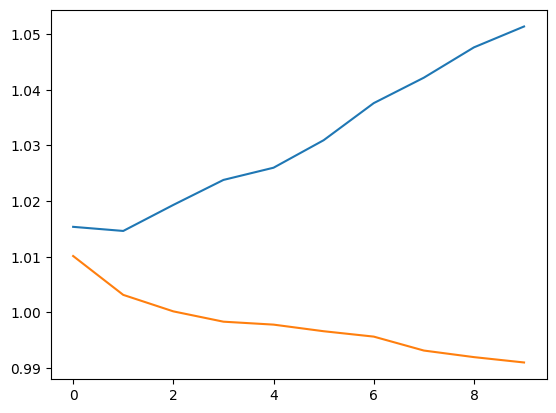

In [ ]:
plt.plot(np.exp(log_recon1))
plt.plot(np.exp(log_recon2))

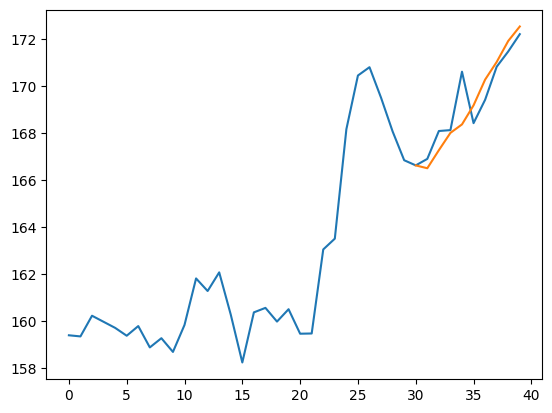

In [ ]:
Start = 30
plt.plot(data1[-40:])
plt.plot(range(Start,Start+10),data1[-10]*np.exp(log_recon1-log_recon1[0]))

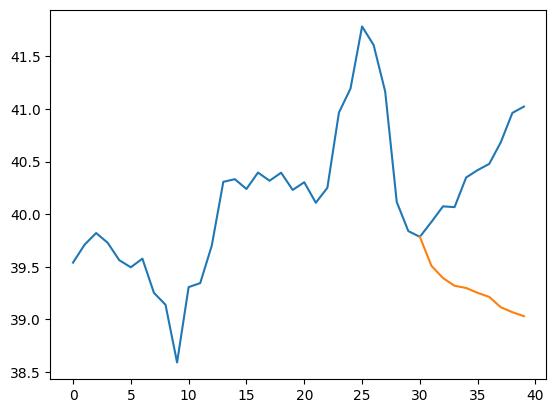

In [ ]:
plt.plot(data2[-40:])
plt.plot(range(Start,Start+10),data2[-10]*np.exp(log_recon2-log_recon2[0]))